# Project Name - TELECOM CHURN ANALYSIS

## Problem Statement

### Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

# Importing Library 

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing DataSet

In [23]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8KDYOLvwQLWc1wru7Fu0tzzFwA2xjKTDaPbwJsTrZ3Rk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'playstoreappreviewanalysis-donotdelete-pr-93veye059pusd0'
object_key = 'telecom_churn.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

df_2 = pd.read_excel(body.read())
df_2.head(10)



,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
5,6,Vodafone,M,36,Uttarakhand,Chennai,120612,2020-01-01,1,73452,91,24,8109,0
6,7,BSNL,F,60,Karnataka,Delhi,609616,2020-01-01,1,110035,36,13,8512,0
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,2020-01-01,4,104541,87,40,2245,1
8,9,Reliance Jio,F,53,Himachal Pradesh,Mumbai,765257,2020-01-01,2,79439,34,12,10039,0
9,10,BSNL,F,57,Rajasthan,Mumbai,506308,2020-01-01,0,126422,61,33,567,0


In [24]:
df_2.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           243553 non-null  int64         
 1   telecom_partner       243553 non-null  object        
 2   gender                243553 non-null  object        
 3   age                   243553 non-null  int64         
 4   state                 243553 non-null  object        
 5   city                  243553 non-null  object        
 6   pincode               243553 non-null  int64         
 7   date_of_registration  243553 non-null  datetime64[ns]
 8   num_dependents        243553 non-null  int64         
 9   estimated_salary      243553 non-null  int64         
 10  calls_made            243553 non-null  int64         
 11  sms_sent              243553 non-null  int64         
 12  data_used             243553 non-null  int64         
 13 

In [26]:
df_2.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [28]:
df_2.shape

(243553, 14)

In [27]:
df_2.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

In [30]:
for i in df_2.columns.tolist():
    print("No. of unique values in ", i, "is ->  ", df_2[i].nunique())


No. of unique values in  customer_id is ->   243553
No. of unique values in  telecom_partner is ->   4
No. of unique values in  gender is ->   2
No. of unique values in  age is ->   57
No. of unique values in  state is ->   28
No. of unique values in  city is ->   6
No. of unique values in  pincode is ->   213442
No. of unique values in  date_of_registration is ->   1220
No. of unique values in  num_dependents is ->   5
No. of unique values in  estimated_salary is ->   110032
No. of unique values in  calls_made is ->   119
No. of unique values in  sms_sent is ->   59
No. of unique values in  data_used is ->   11837
No. of unique values in  churn is ->   2


In [32]:
df_2.duplicated().sum()

0

In [37]:
df_2.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

# Looking at Null Values

<Axes: >

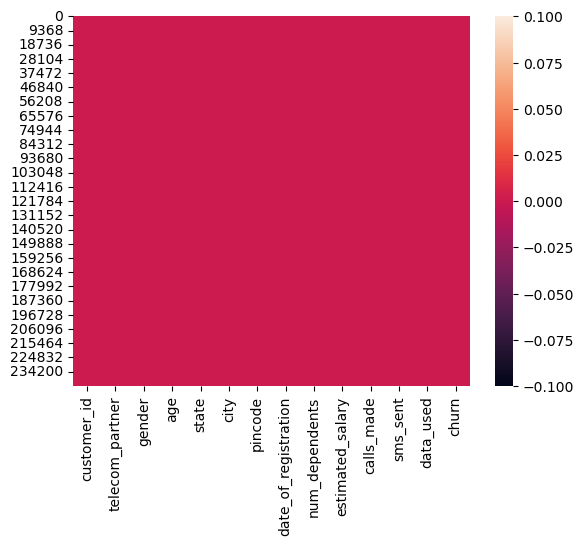

In [34]:
sns.heatmap(df_2.isnull())

# Variables Description

customer_id	 ---> Unique ids
telecom_partner	--> what service provider they using
gender	--> sex
age	--> age
state	
city	
pincode	date_of_registration	
num_dependents	--> number dependent on the person
estimated_salary	
calls_made	
sms_sent	
data_used	
churn

In [45]:
print("User Churning total_count" , df_2[df_2['churn']==1].churn.count())

User Churning total_count 48827


In [48]:
churn_df = df_2[df_2['churn']==1]
churn_df

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,2020-01-01,4,104541,87,40,2245,1
10,11,Airtel,M,44,Uttarakhand,Chennai,776250,2020-01-01,0,133288,7,7,1275,1
16,17,Vodafone,M,61,Himachal Pradesh,Hyderabad,734068,2020-01-01,2,59723,16,42,8157,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243523,243524,Reliance Jio,F,38,Gujarat,Delhi,112512,2023-05-03,0,69163,86,10,7323,1
243527,243528,BSNL,F,50,Uttar Pradesh,Mumbai,613558,2023-05-03,3,126994,39,2,3186,1
243529,243530,Reliance Jio,M,45,Punjab,Kolkata,190431,2023-05-03,2,110127,58,24,2852,1
243533,243534,Reliance Jio,F,22,West Bengal,Kolkata,732518,2023-05-03,2,123399,69,9,448,1


In [50]:
print("No of Unique Partner Code :", df_2['telecom_partner'].nunique())


No of Unique Partner Code : 4


In [53]:
# % of total customers churning
print("Total no. of customers :", df_2.churn.count())
perc_churn = (churn_df.churn.count()/df_2.churn.count())*100
print(f"Percentage of customer churning : {round(perc_churn,2)}%")

Total no. of customers : 243553
Percentage of customer churning : 20.05%


In [54]:
#Statewise customer churning
state_cust_churn = churn_df.groupby(['state'])['churn'].value_counts().reset_index(name='churn_customer')
print(state_cust_churn.sum())
state_cust_churn

state             Andhra PradeshArunachal PradeshAssamBiharChhat...
churn                                                            28
churn_customer                                                48827
dtype: object


,state,churn,churn_customer
0,Andhra Pradesh,1,1717
1,Arunachal Pradesh,1,1742
2,Assam,1,1735
3,Bihar,1,1695
4,Chhattisgarh,1,1686
5,Goa,1,1735
6,Gujarat,1,1724
7,Haryana,1,1751
8,Himachal Pradesh,1,1772
9,Jharkhand,1,1849


In [57]:
# Area Code wise churn Percentage
Area_code_churn_perc = (df_2.groupby(['state'])['churn'].mean()*100).reset_index()
Area_code_churn_perc

,state,churn
0,Andhra Pradesh,19.852006
1,Arunachal Pradesh,19.892657
2,Assam,20.299520
3,Bihar,19.633963
4,Chhattisgarh,19.430679
5,Goa,19.956292
6,Gujarat,20.023229
7,Haryana,20.034325
8,Himachal Pradesh,20.410044
9,Jharkhand,21.119360


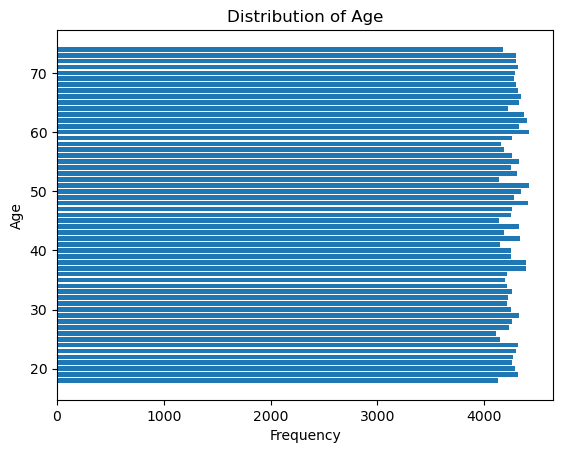

In [69]:
plt.barh(df_2['age'].value_counts().index, df_2['age'].value_counts())
plt.title('Distribution of Age')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()

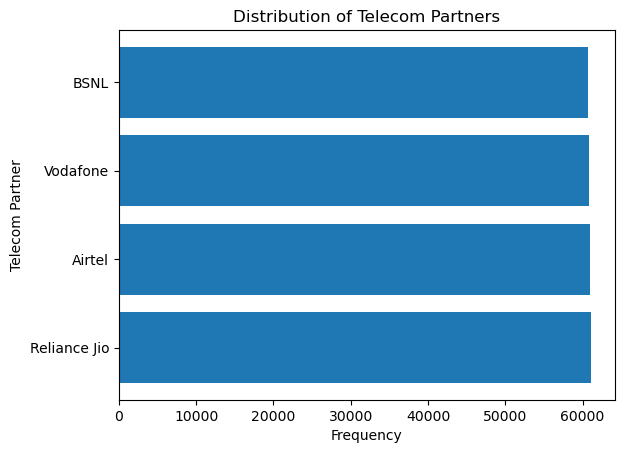

In [67]:
plt.barh(df_2['telecom_partner'].value_counts().index, df_2['telecom_partner'].value_counts())
plt.title('Distribution of Telecom Partners')
plt.xlabel('Frequency')
plt.ylabel('Telecom Partner')
plt.show()

In [73]:
# Create a new feature 'avg_daily_data_used'
df_2['avg_daily_data_used'] = df_2['data_used'] / 30

# Create a new feature 'avg_daily_calls_made'
df_2['avg_daily_calls_made'] = df_2['calls_made'] / 30

# Create a new feature 'avg_daily_sms_sent'
df_2['avg_daily_sms_sent'] = df_2['sms_sent'] / 30

# Print the updated dataset
print(df_2.head())

   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962          44   
1   125926           2020-01-01               2            130556          62   
2   423976           2020-01-01               0            148828          49   
3   522841           2020-01-01               1             38722          80   
4   740247           2020-01-01               2             55098          78   

   sms_sent  data_used  churn  avg_daily_data_used  avg_daily_calls_

In [84]:
# Percentage of People with number of sms churning/not-churning to other networks
sms_sent_churn = df_2.groupby(['churn'])['sms_sent'].mean().reset_index(name='churn_msg')
sms_sent_churn

,churn,churn_msg
0,0,23.968068
1,1,23.855019


In [83]:
# Percentage of People with number of call churning/not-churning to other networks
calls_made_churn = df_2.groupby(['churn'])['calls_made'].mean().reset_index(name='churn_call')
calls_made_churn

,churn,churn_call
0,0,48.985590
1,1,49.110083


0    194726
1     48827
Name: churn, dtype: int64
 


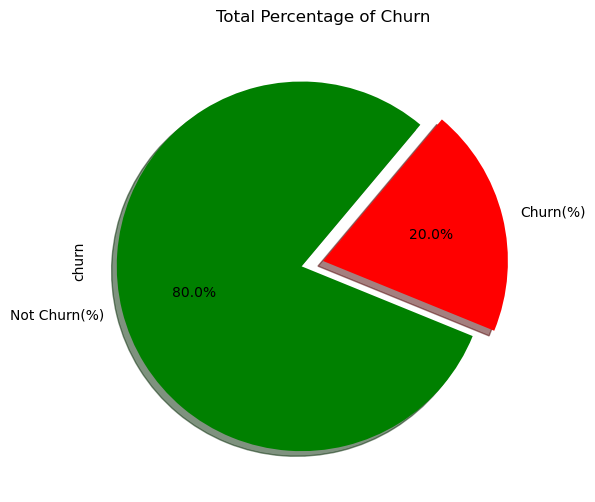

In [91]:
print(df_2.churn.value_counts())
print(" ")

# Dependent Variable Column Visualization
df_2['churn'].value_counts().plot( kind='pie',figsize=(10,6),
                                        autopct="%1.1f%%",
startangle=50,
shadow=True,
labels=['Not Churn(%)','Churn(%)'],
colors=['green','red'],explode=[0.12,0])
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

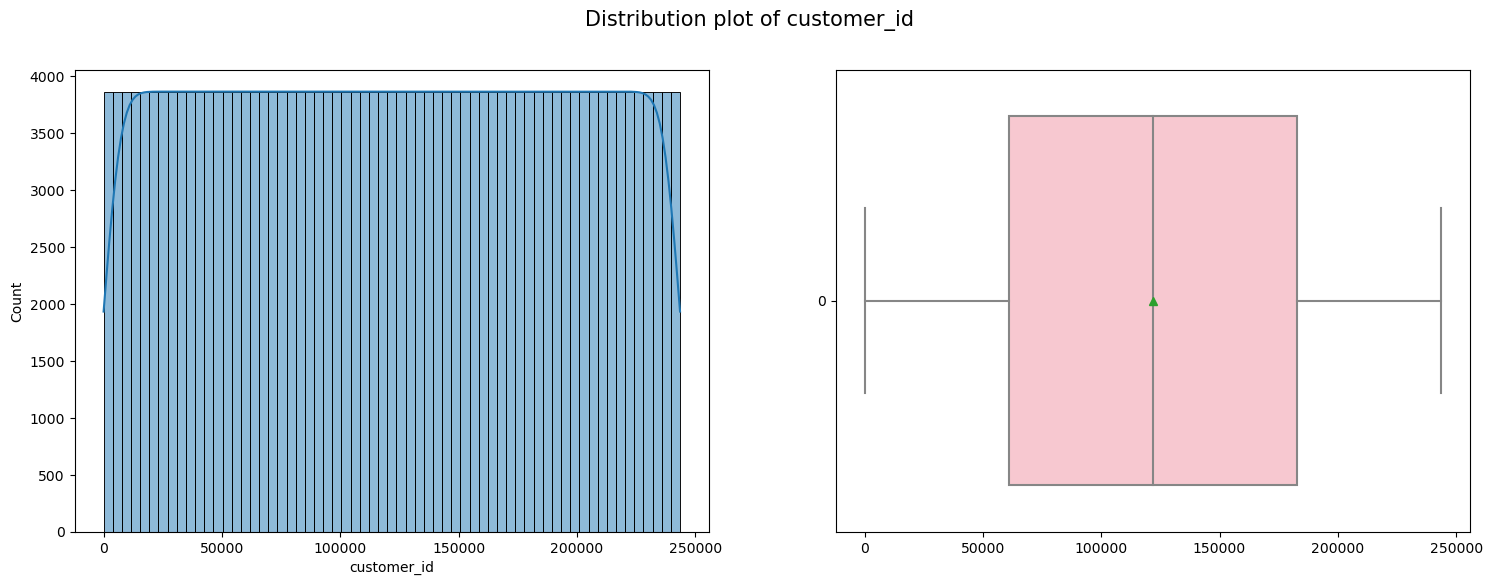

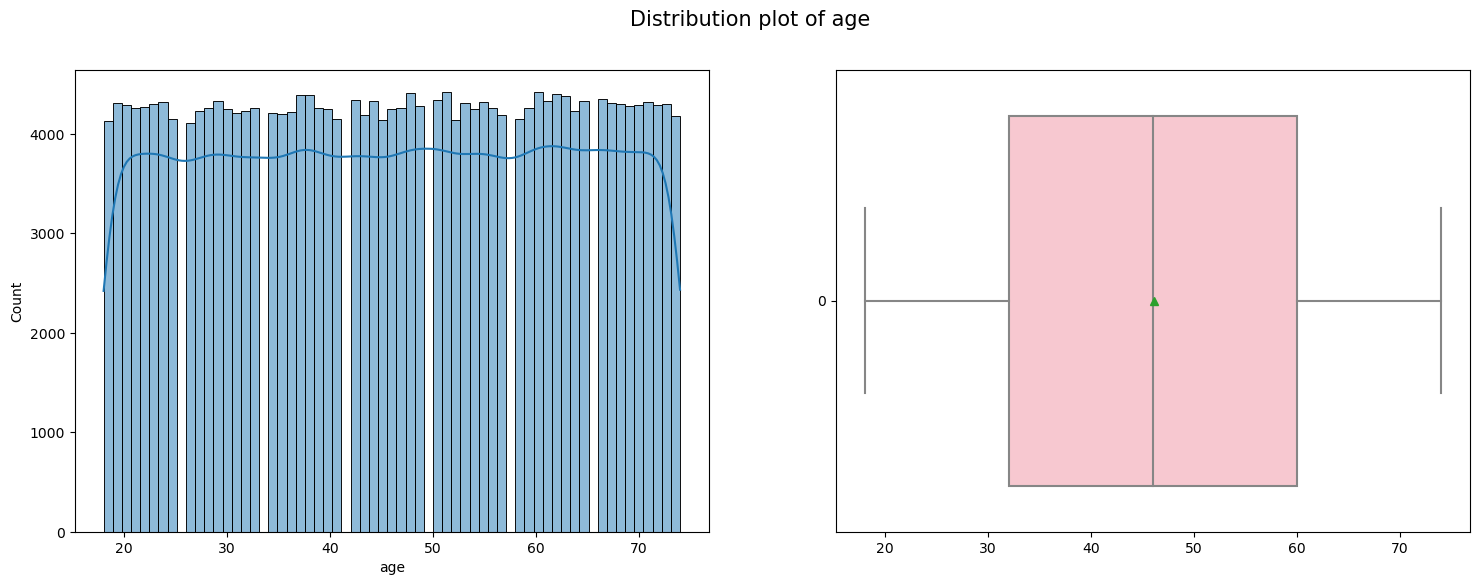

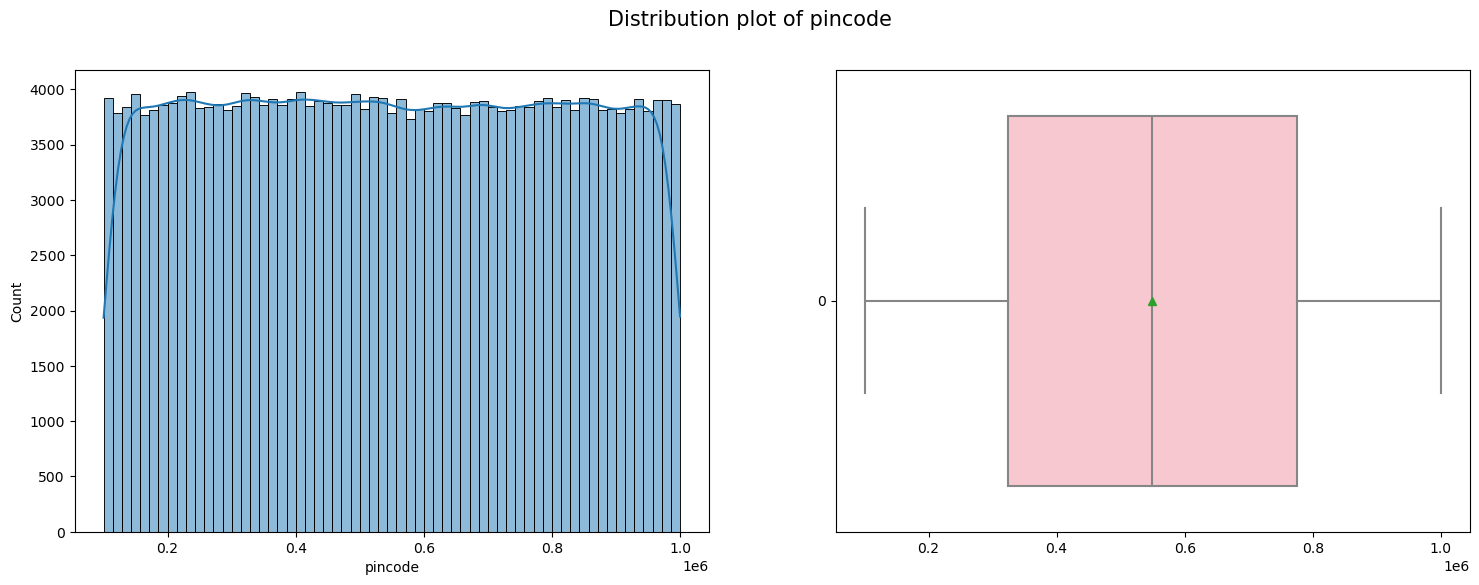

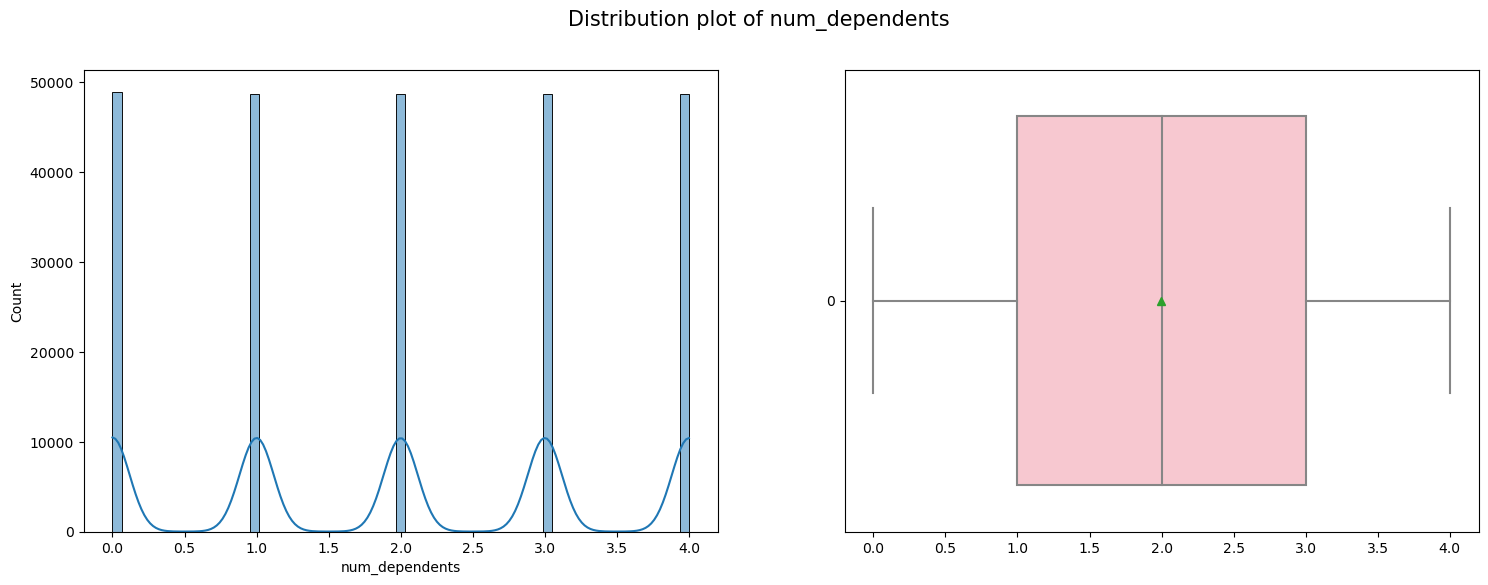

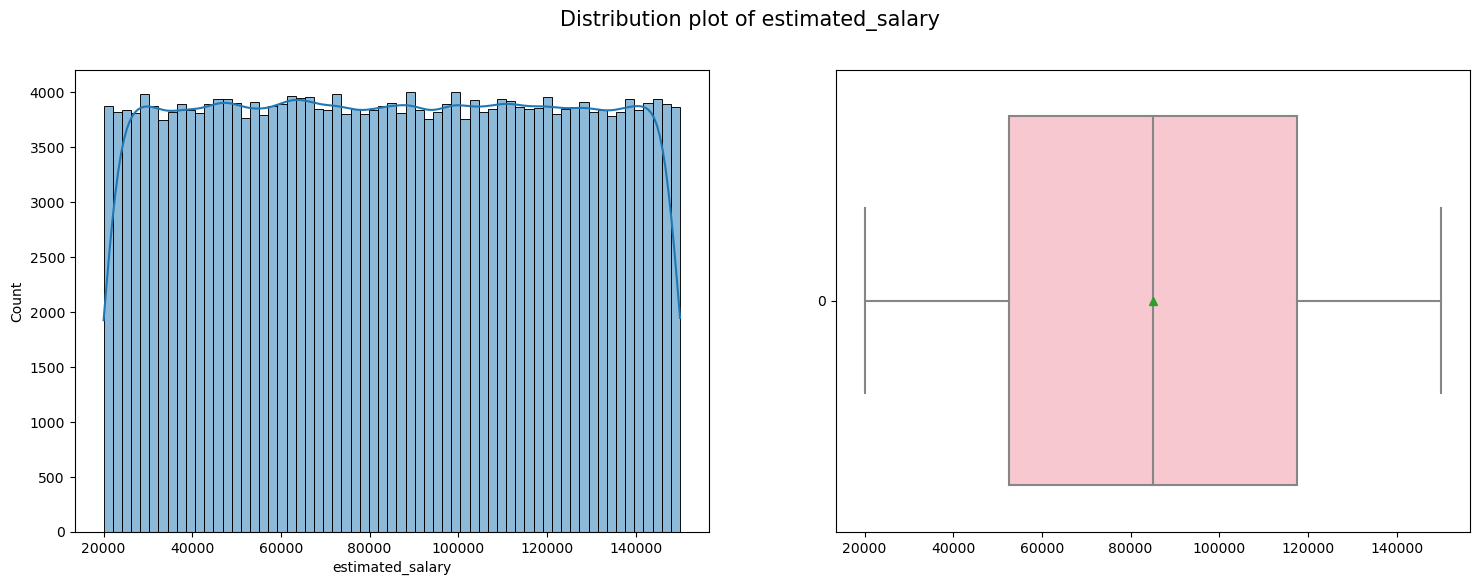

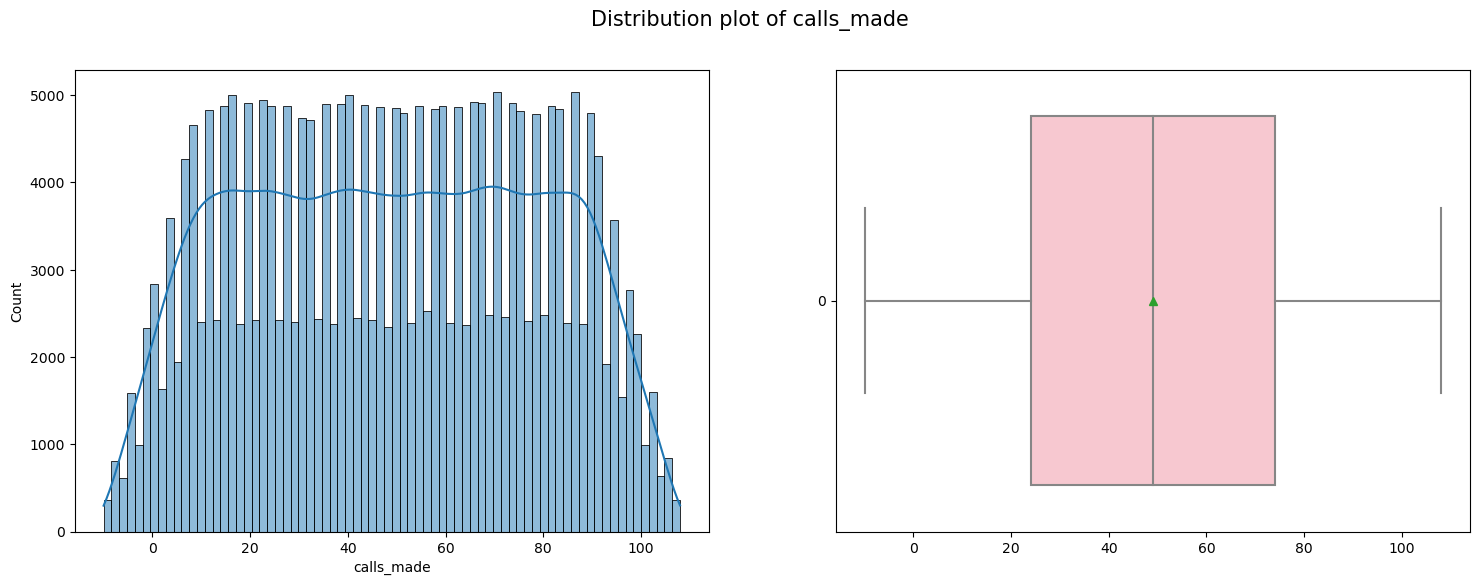

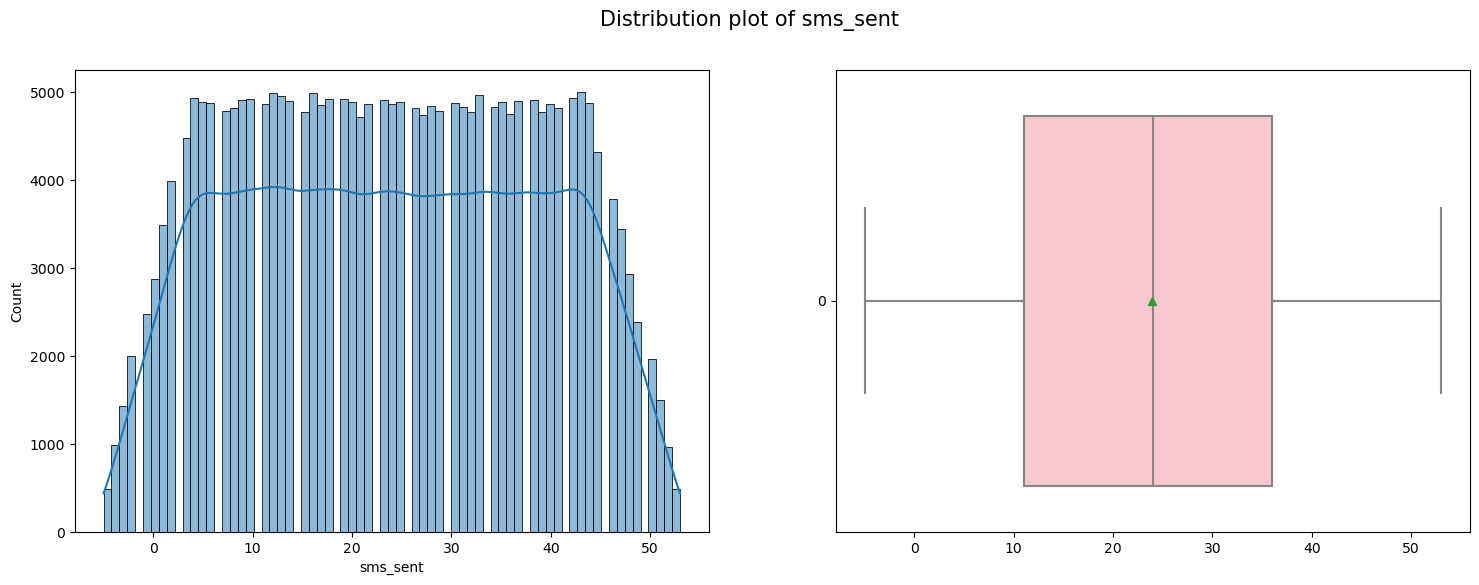

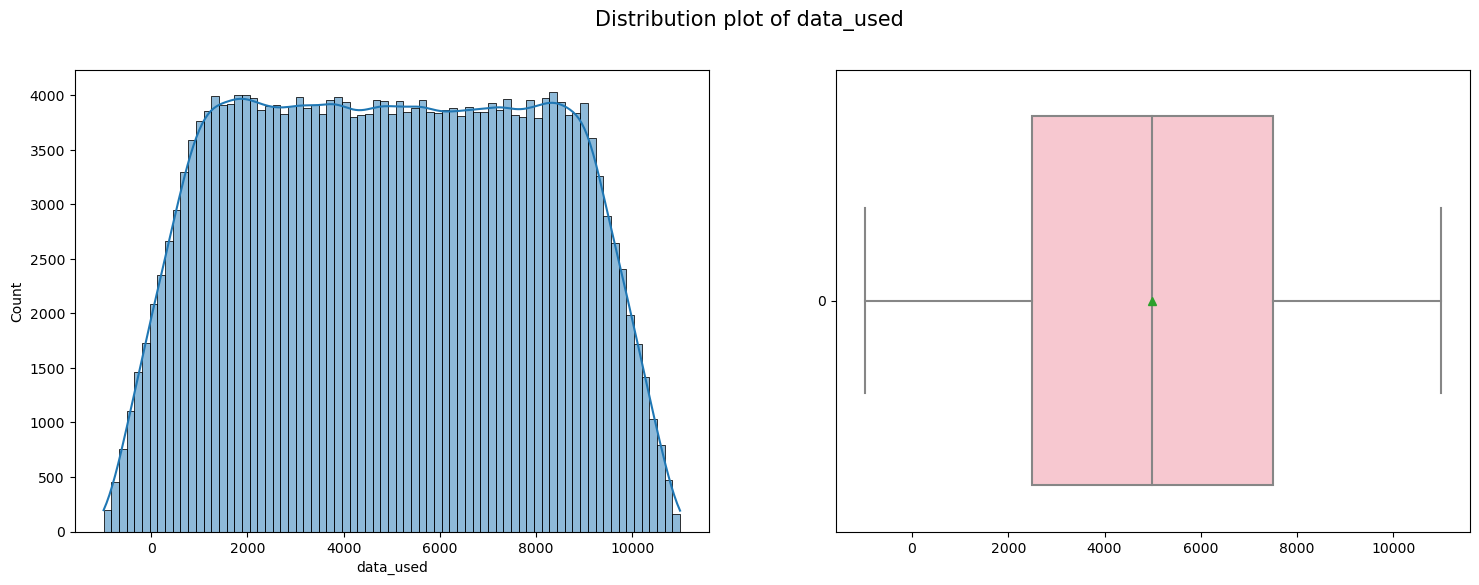

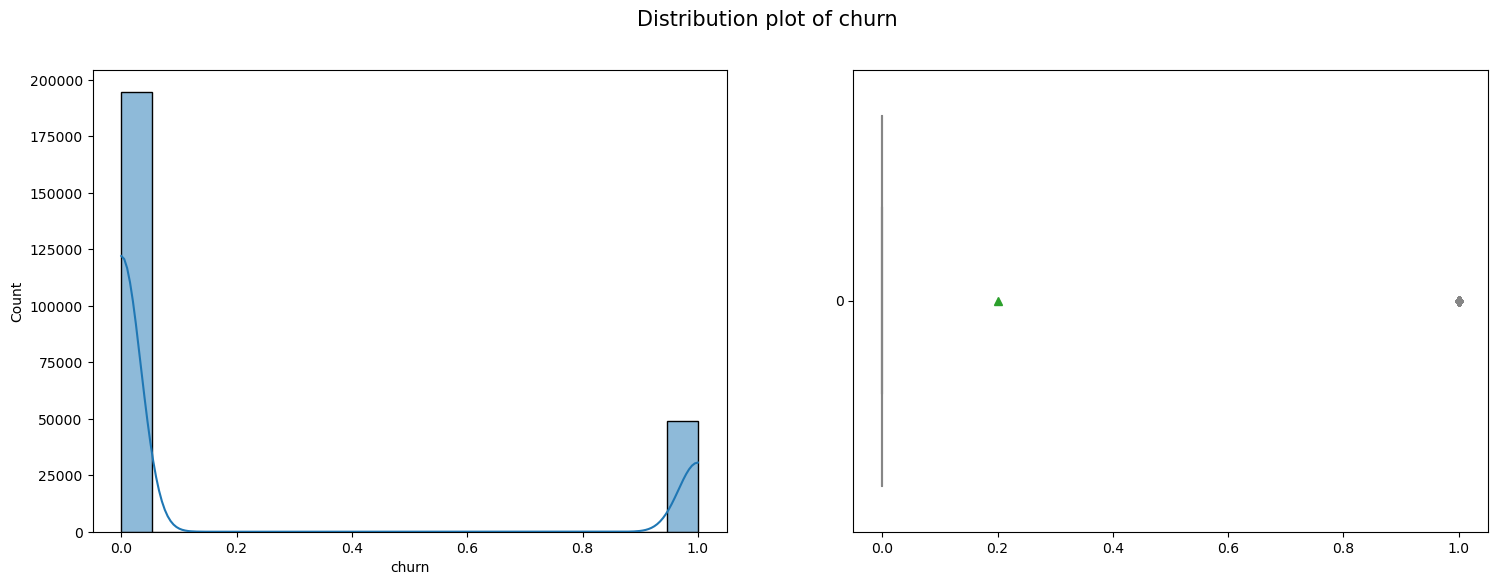

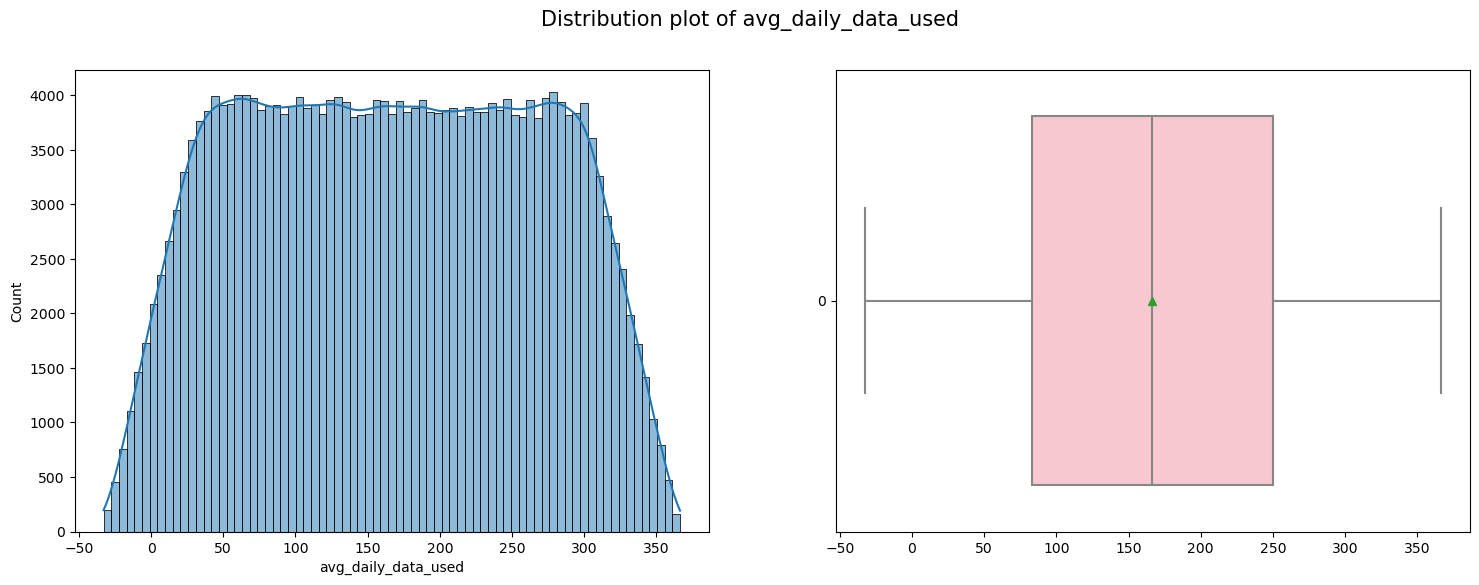

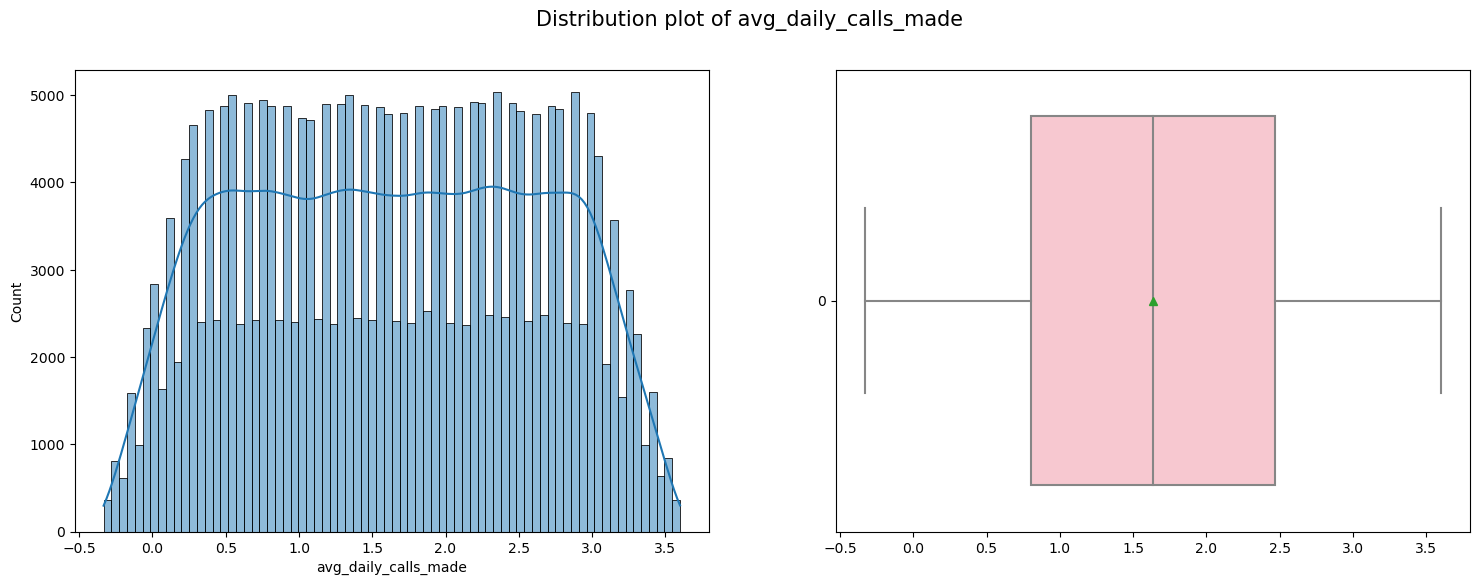

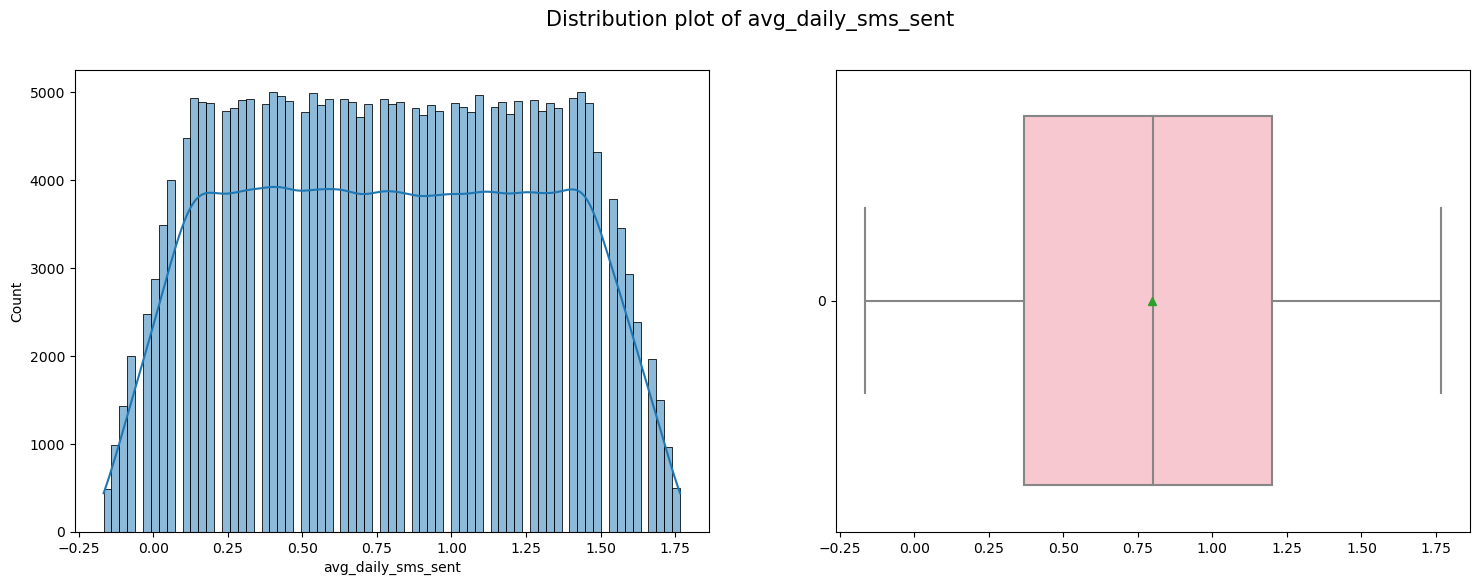

In [93]:
for col in df_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(df_2[col], ax = axes[0],kde = True)
    sns.boxplot(df_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

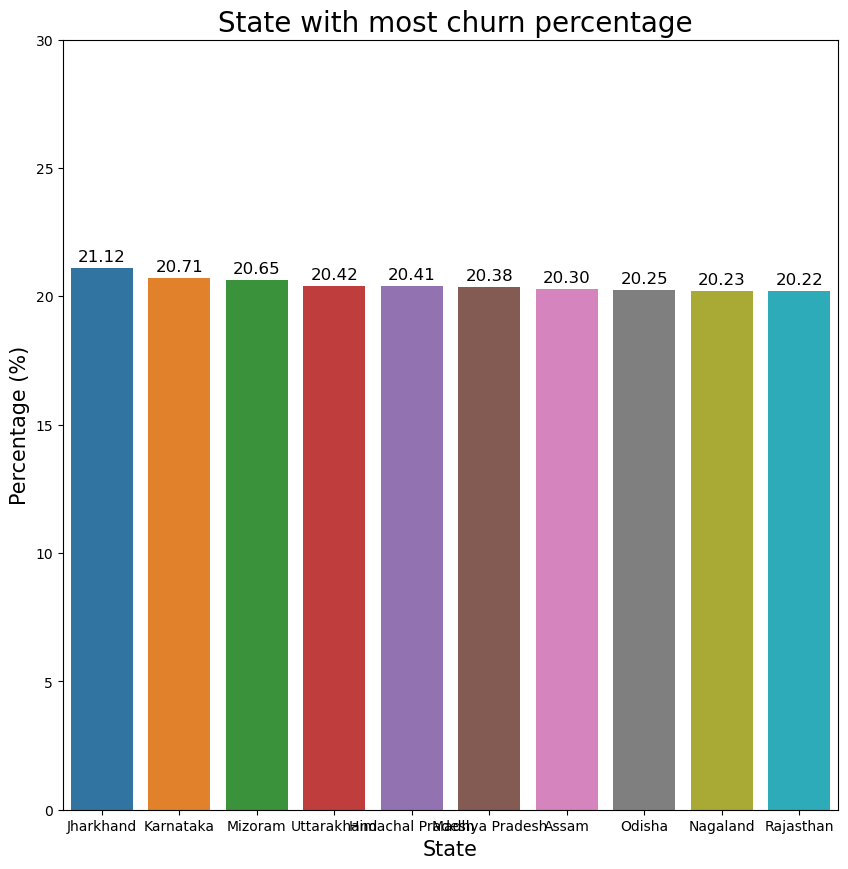

In [99]:
plt.figure(figsize=(10,10))
bar1 = ((df_2.groupby(['state'])['churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'state', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,30)
plt.show()

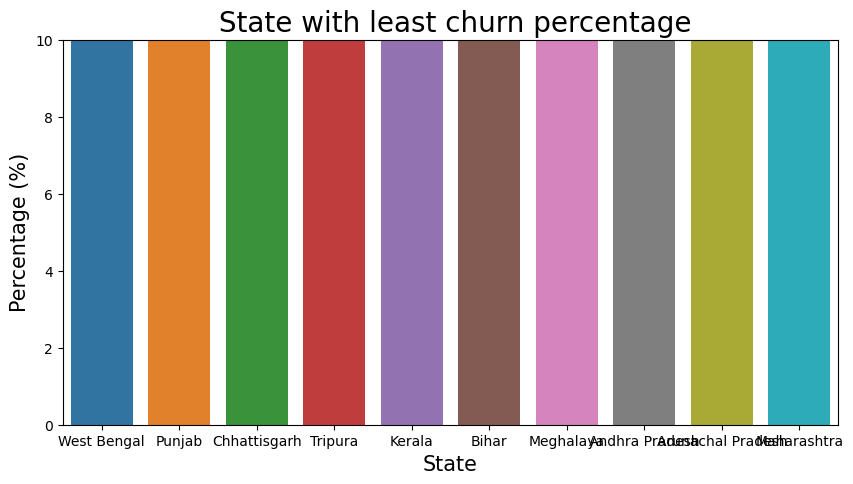

In [102]:
plt.figure(figsize=(10,5))
bar1 = ((df_2.groupby(['state'])['churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'state', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of y axis from 0 to 10
plt.ylim(0,10)
plt.show()

/tmp/wsuser/ipykernel_163/2270203747.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_2.corr()


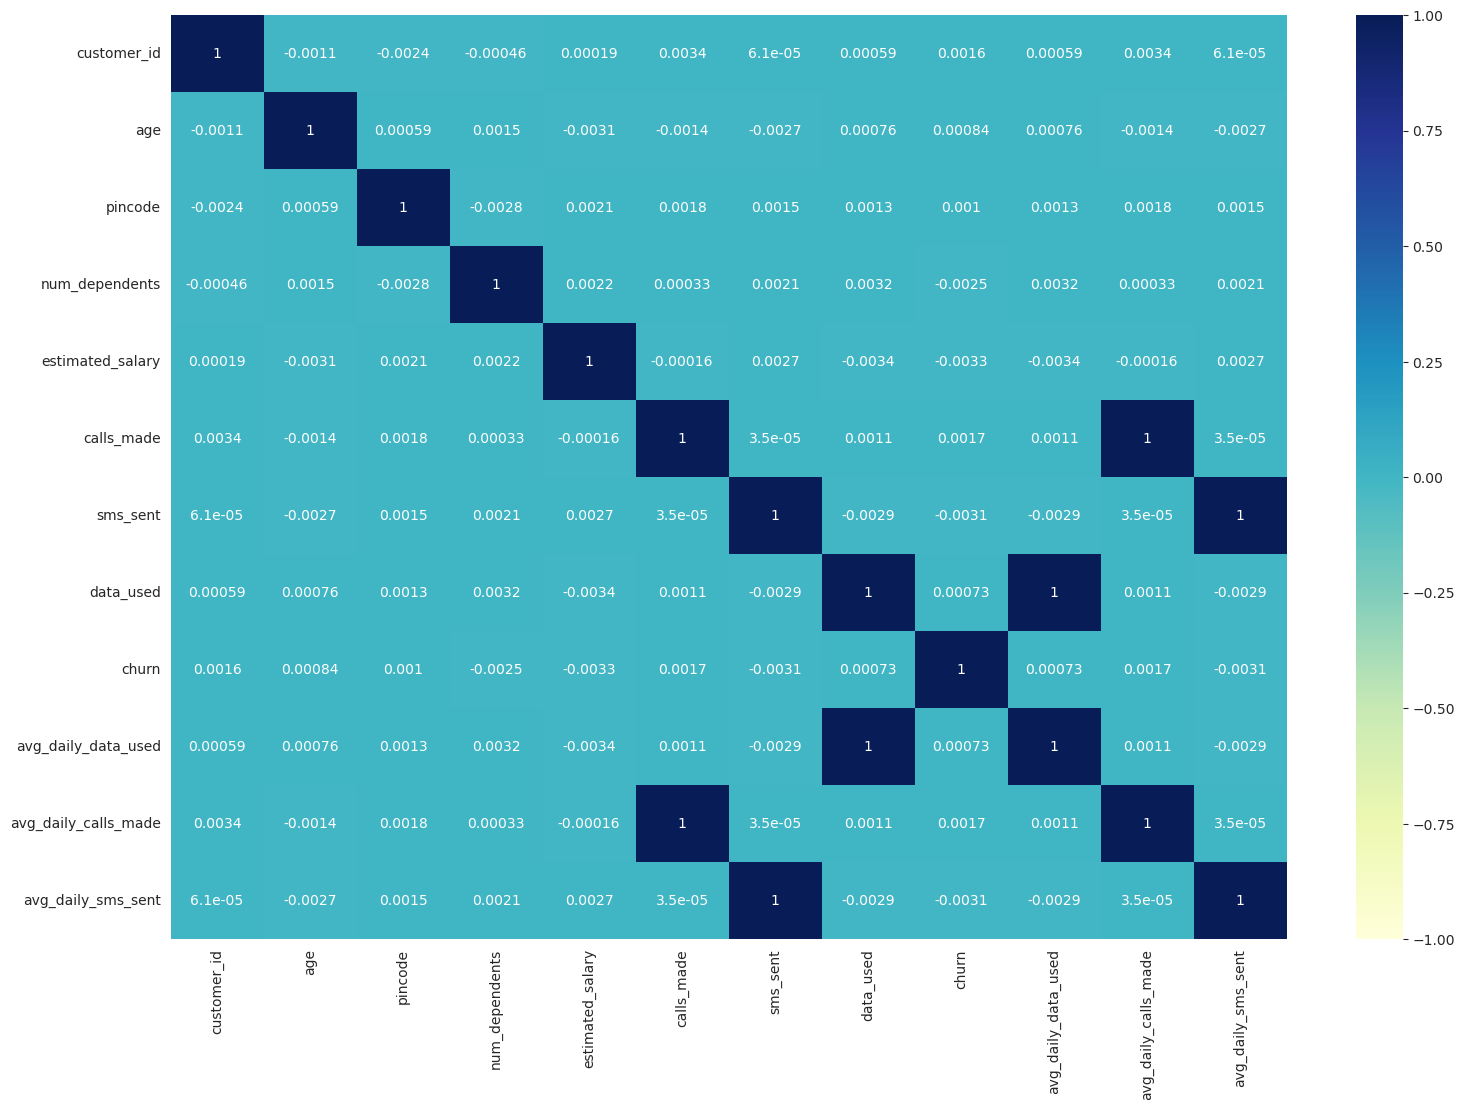

In [106]:
corr = df_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = False

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 12))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")